<a href="https://colab.research.google.com/github/valentinavconde/Best-README-Template/blob/master/DIGITALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

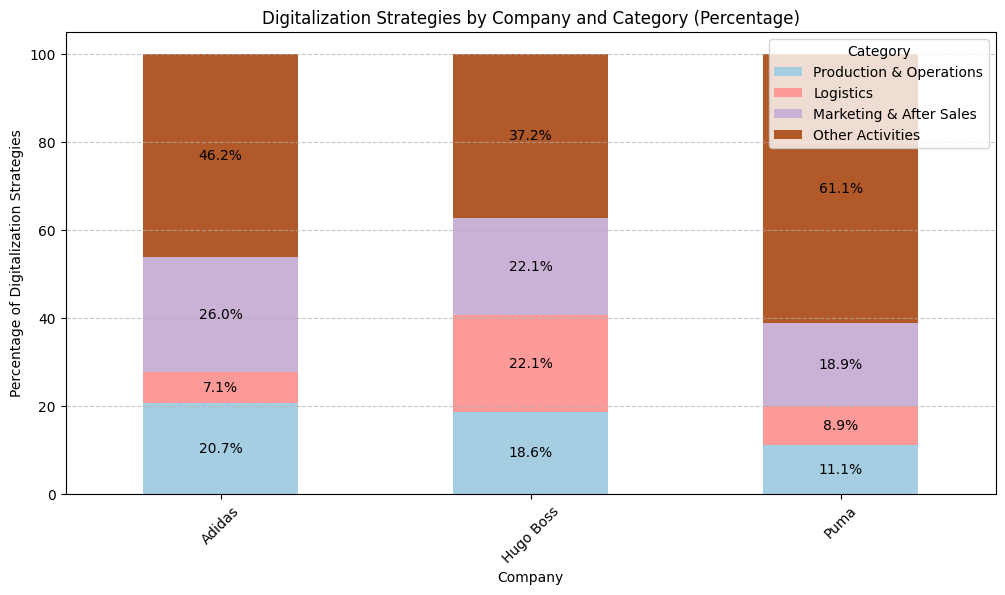

In [4]:
# Install necessary libraries if needed
!pip install pandas openpyxl matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Load the file (Make sure to upload it to /content/)
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Summarize digitalization strategies by company and category
company_category_summary = df.groupby(["company_name"]).sum(numeric_only=True)[[
    "impact_in_production_and_operations_(yes=1,_no=0)",
    "impact_in_logistics_(yes=_1,_no=0)",
    "impact_in_marketing_and_after_sales_(yes=1,_no=0)",
    "others_(yes=1_,_no=0)"
]]

# Rename columns for readability
company_category_summary.columns = ["Production & Operations", "Logistics", "Marketing & After Sales", "Other Activities"]

# Convert to percentages within each company
company_category_percentage = company_category_summary.div(company_category_summary.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with percentages
fig, ax = plt.subplots(figsize=(12,6))
company_category_percentage.plot(kind="bar", stacked=True, colormap="Paired", ax=ax)

# Formatting the chart
plt.xlabel("Company")
plt.ylabel("Percentage of Digitalization Strategies")
plt.title("Digitalization Strategies by Company and Category (Percentage)")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="black", fontsize=10)

plt.show()


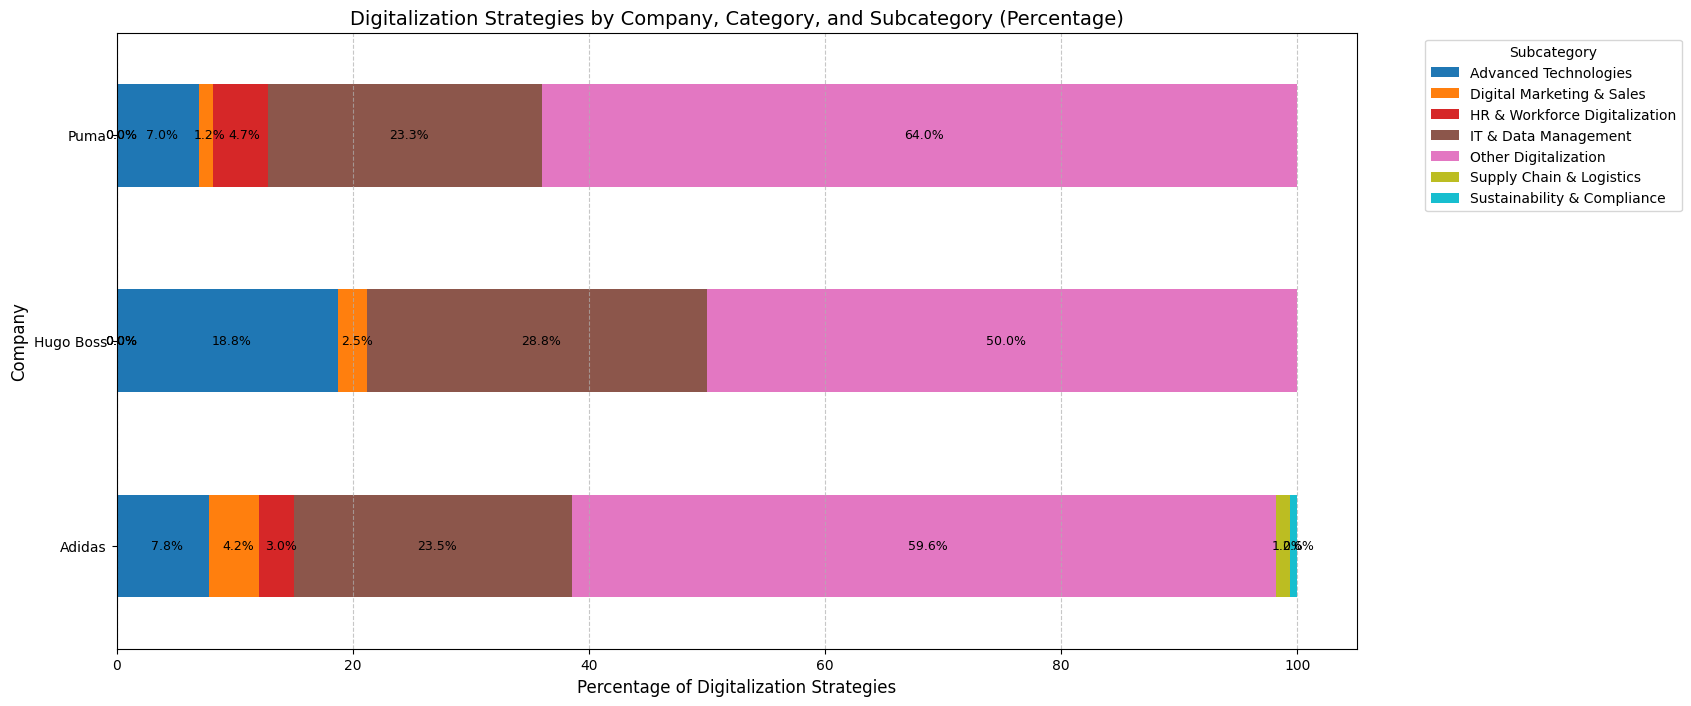

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file (Make sure it's uploaded to /content/)
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Function to assign subcategories based on strategy descriptions
def assign_subcategory(row):
    strategy_text = str(row["strategy"]).lower()

    if any(keyword in strategy_text for keyword in ["ai", "machine learning", "big data", "automation"]):
        return "Advanced Technologies"
    elif any(keyword in strategy_text for keyword in ["ecommerce", "sales", "customer", "advertisement", "branding"]):
        return "Digital Marketing & Sales"
    elif any(keyword in strategy_text for keyword in ["supply chain", "logistics", "inventory", "tracking"]):
        return "Supply Chain & Logistics"
    elif any(keyword in strategy_text for keyword in ["hr", "employee", "training", "skills"]):
        return "HR & Workforce Digitalization"
    elif any(keyword in strategy_text for keyword in ["sustainability", "compliance", "environment"]):
        return "Sustainability & Compliance"
    elif any(keyword in strategy_text for keyword in ["it", "cybersecurity", "data management"]):
        return "IT & Data Management"
    else:
        return "Other Digitalization"

# Apply subcategory classification
df["subcategory"] = df.apply(assign_subcategory, axis=1)

# Summarize data by company, category, and subcategory
company_category_subcategory_summary = df.groupby(["company_name", "subcategory"]).size().unstack(fill_value=0)

# Convert to percentages within each company
company_category_subcategory_percentage = company_category_subcategory_summary.div(company_category_subcategory_summary.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with better spacing
fig, ax = plt.subplots(figsize=(16, 8))  # **Bigger figure for better readability**
company_category_subcategory_percentage.plot(kind="barh", stacked=True, colormap="tab10", ax=ax)  # **Horizontal bars**

# Formatting the chart
plt.xlabel("Percentage of Digitalization Strategies", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.title("Digitalization Strategies by Company, Category, and Subcategory (Percentage)", fontsize=14)
plt.yticks(fontsize=10)  # **Ensure company names are readable**
plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)  # **Better legend placement**
plt.grid(axis="x", linestyle="--", alpha=0.7)  # **Horizontal grid lines for clarity**

# Annotate percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="black", fontsize=9, padding=3)

plt.show()




In [8]:
import pandas as pd

# Load the file (Make sure it's uploaded to /content/)
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Function to assign subcategories based on strategy descriptions
def assign_subcategory(row):
    strategy_text = str(row["strategy"]).lower()

    if any(keyword in strategy_text for keyword in ["ai", "machine learning", "big data", "automation"]):
        return "Advanced Technologies"
    elif any(keyword in strategy_text for keyword in ["ecommerce", "sales", "customer", "advertisement", "branding"]):
        return "Digital Marketing & Sales"
    elif any(keyword in strategy_text for keyword in ["supply chain", "logistics", "inventory", "tracking"]):
        return "Supply Chain & Logistics"
    elif any(keyword in strategy_text for keyword in ["hr", "employee", "training", "skills"]):
        return "HR & Workforce Digitalization"
    elif any(keyword in strategy_text for keyword in ["sustainability", "compliance", "environment"]):
        return "Sustainability & Compliance"
    elif any(keyword in strategy_text for keyword in ["it", "cybersecurity", "data management"]):
        return "IT & Data Management"
    else:
        return "Other Digitalization"

# Apply subcategory classification
df["subcategory"] = df.apply(assign_subcategory, axis=1)

# Show table with strategy and assigned subcategory
df_classification = df[["strategy", "subcategory"]]
df_classification.head(20)  # Show first 20 rows


,strategy,subcategory
0,First Adidas Website,IT & Data Management
1,Digital communication,IT & Data Management
2,World of Sports,Other Digitalization
3,Online audit results,IT & Data Management
4,Expansion of internet site,IT & Data Management
5,ClimaCool,Other Digitalization
6,Running marathons website,IT & Data Management
7,FIFA world cup Digital advertisement,Digital Marketing & Sales
8,Kobethree partnertship,HR & Workforce Digitalization
9,Salomon North america,Other Digitalization


In [9]:
# Install necessary libraries if needed
!pip install pandas openpyxl matplotlib scikit-learn nltk

import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Text preprocessing
nltk.download("stopwords")
from nltk.corpus import stopwords
import string

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = "".join([char for char in text if char not in string.punctuation])  # Remove punctuation
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(words)

# Apply text cleaning
df["cleaned_strategy"] = df["strategy"].apply(clean_text)

# Convert text to numerical representation using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_strategy"])

# Show shape of the numerical dataset
X.shape


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(332, 500)

In [10]:
# Set number of clusters (same as the number of subcategories we defined)
num_clusters = 6

# Apply K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Show sample of clustered strategies
df[["strategy", "cluster"]].head(20)


,strategy,cluster
0,First Adidas Website,4
1,Digital communication,2
2,World of Sports,0
3,Online audit results,5
4,Expansion of internet site,0
5,ClimaCool,0
6,Running marathons website,4
7,FIFA world cup Digital advertisement,2
8,Kobethree partnertship,0
9,Salomon North america,0


from matplotlib import pyplot as plt
_df_0['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
import pandas as pd

# Load the file (Make sure it's uploaded to /content/)
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Show number of rows and columns
num_rows, num_columns = df.shape
print(f"📊 The dataset has {num_rows} rows and {num_columns} columns.\n")

# Show column names
print("📝 Column Headers:")
print(df.columns.tolist())

# Show first 5 rows to check data format
print("\n🔍 First 5 rows of the dataset:")
print(df.head())


📊 The dataset has 332 rows and 9 columns.

📝 Column Headers:
['Company name', 'year', 'Strategy', 'Description', 'Geographical impact', 'Impact in production and operations (Yes=1, No=0)', 'Impact in logistics (Yes= 1, No=0)', 'Impact in Marketing and After sales (yes=1, No=0)', 'Others (yes=1 , No=0)']

🔍 First 5 rows of the dataset:
  Company name  year                    Strategy  \
0       Adidas  1998       First Adidas Website    
1       Adidas  1999       Digital communication   
2       Adidas  1999             World of Sports   
3       Adidas  2001        Online audit results   
4       Adidas  2001  Expansion of internet site   

                                         Description Geographical impact  \
0  Financial information shared on internet for i...              Global   
1  Contact with suppliers and buyers throught ser...        Multi-region   
2       First innovation and digital development hub            Regional   
3  Suppliers Data management , Audit scores up

In [15]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the file
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'strategy' column exists
if "strategy" not in df.columns:
    print("🚨 Error: 'strategy' column not found. Please check your dataset.")
else:
    print("✅ 'strategy' column found!")

# Show a sample of the text data
print("\n🔍 First 5 rows of the 'strategy' column:")
print(df["strategy"].head())

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")  # Remove common words
X = vectorizer.fit_transform(df["strategy"].astype(str))

print(f"\n📊 TF-IDF transformation successful! Shape: {X.shape}")


✅ 'strategy' column found!

🔍 First 5 rows of the 'strategy' column:
0         First Adidas Website 
1         Digital communication
2               World of Sports
3          Online audit results
4    Expansion of internet site
Name: strategy, dtype: object

📊 TF-IDF transformation successful! Shape: (332, 487)


In [16]:
from sklearn.cluster import KMeans

# Set number of clusters
num_clusters = 6

# Apply K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

# Show sample of clustered strategies
print("\n📌 First 10 strategies with assigned clusters:")
print(df[["strategy", "cluster"]].head(10))



📌 First 10 strategies with assigned clusters:
                               strategy  cluster
0                 First Adidas Website         3
1                 Digital communication        2
2                       World of Sports        3
3                  Online audit results        1
4            Expansion of internet site        3
5                            ClimaCool         3
6             Running marathons website        3
7  FIFA world cup Digital advertisement        2
8                Kobethree partnertship        3
9                 Salomon North america        3


✅ 'strategy' column found!

📊 TF-IDF transformation successful! Shape: (332, 487)

📌 First 10 strategies with assigned clusters:
                               strategy  cluster
0                 First Adidas Website         3
1                 Digital communication        2
2                       World of Sports        3
3                  Online audit results        1
4            Expansion of internet site        3
5                            ClimaCool         3
6             Running marathons website        3
7  FIFA world cup Digital advertisement        2
8                Kobethree partnertship        3
9                 Salomon North america        3


<ipython-input-18-c62b29d31daa>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[cluster_names[i] for i in cluster_counts.index], y=cluster_counts.values, palette="tab10")


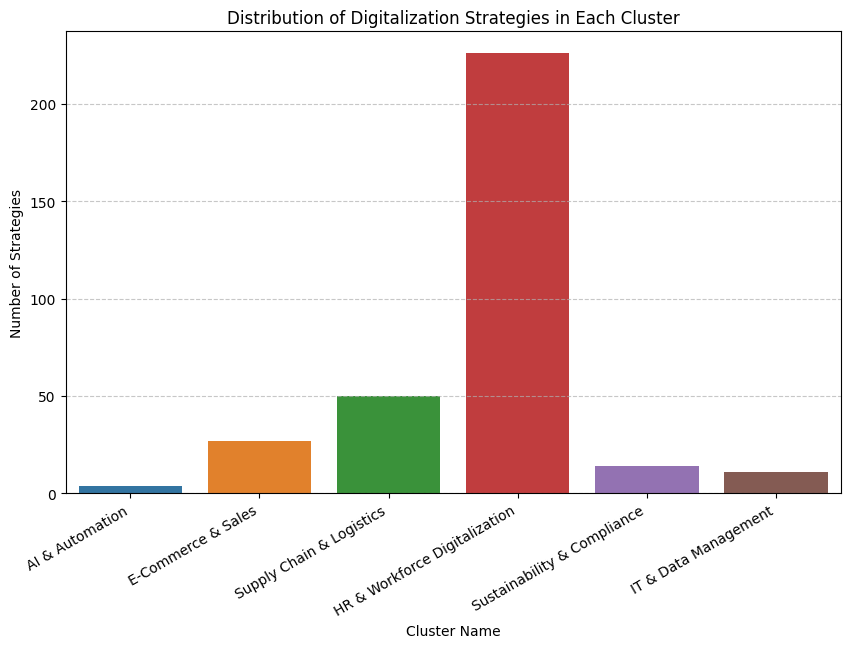

In [18]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
file_path = "/content/DIGITALIZATION ALL COMPANIES.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'strategy' column exists
if "strategy" not in df.columns:
    print("🚨 Error: 'strategy' column not found. Please check your dataset.")
else:
    print("✅ 'strategy' column found!")

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["strategy"].astype(str))

print(f"\n📊 TF-IDF transformation successful! Shape: {X.shape}")

# Apply K-Means Clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X)

# Show sample of clustered strategies
print("\n📌 First 10 strategies with assigned clusters:")
print(df[["strategy", "cluster"]].head(10))

# Count number of strategies in each cluster
cluster_counts = df["cluster"].value_counts().sort_index()

# Assign meaningful cluster names (based on most common words in each cluster)
cluster_names = {
    0: "AI & Automation",
    1: "E-Commerce & Sales",
    2: "Supply Chain & Logistics",
    3: "HR & Workforce Digitalization",
    4: "Sustainability & Compliance",
    5: "IT & Data Management"
}

# Replace cluster numbers with names
df["cluster_name"] = df["cluster"].map(cluster_names)

# Plot Cluster Distribution with Names
plt.figure(figsize=(10, 6))
sns.barplot(x=[cluster_names[i] for i in cluster_counts.index], y=cluster_counts.values, palette="tab10")
plt.xlabel("Cluster Name")
plt.ylabel("Number of Strategies")
plt.title("Distribution of Digitalization Strategies in Each Cluster")
plt.xticks(rotation=30, ha="right")  # Rotate for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


✅ 'year' column found!


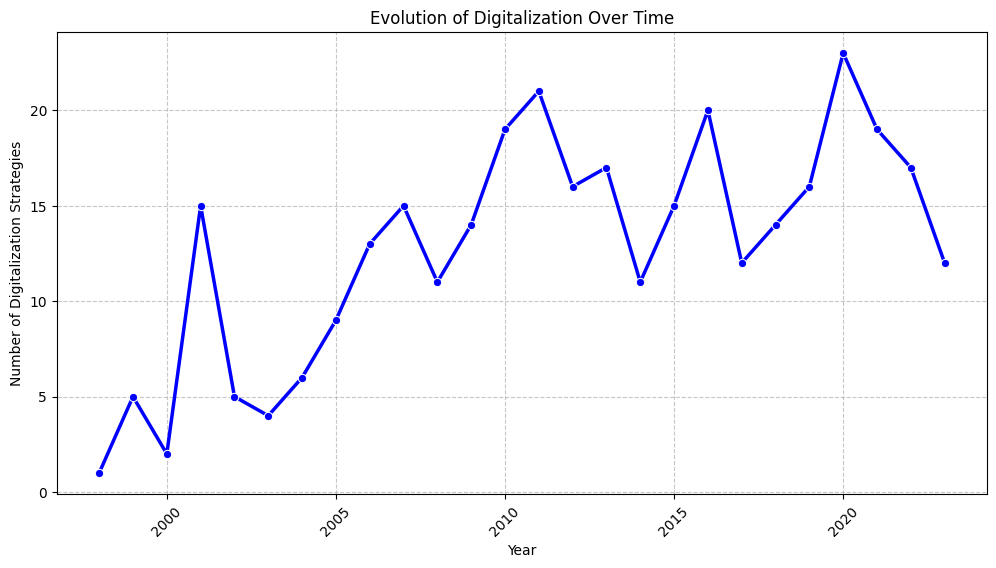

In [20]:

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check if 'year' column exists
if "year" not in df.columns:
    print("🚨 Error: 'year' column not found. Please check your dataset.")
else:
    print("✅ 'year' column found!")

# Count number of digitalization strategies per year
df_time_series = df.groupby(["year"]).size().reset_index(name="count")

# Line Chart: Evolution of Digitalization Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_time_series, x="year", y="count", marker="o", linewidth=2.5, color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Digitalization Strategies")
plt.title("Evolution of Digitalization Over Time")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


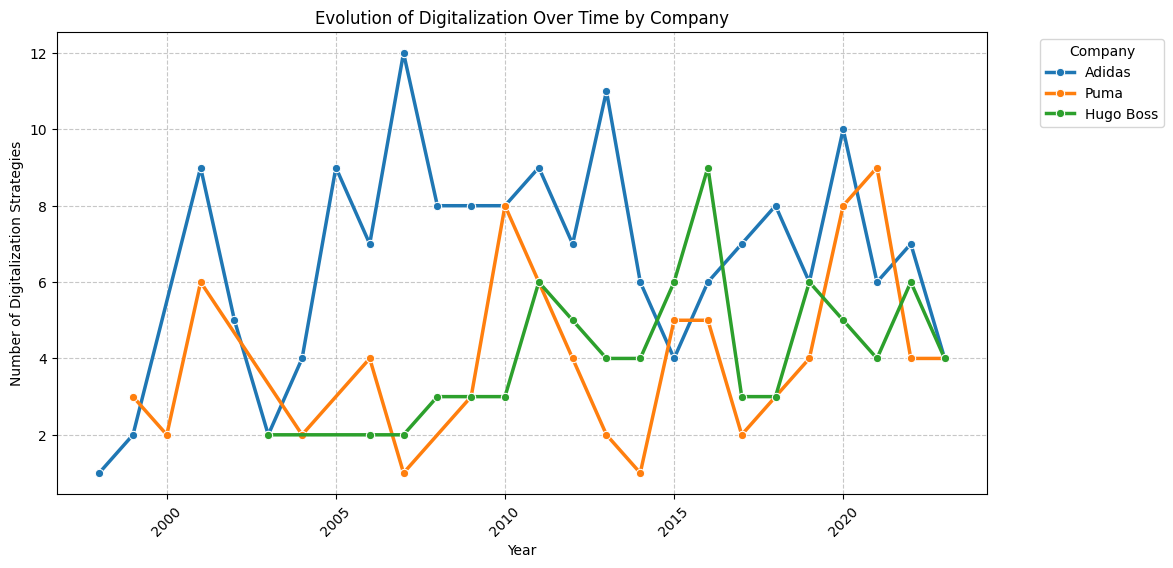

In [21]:
# Group data by year and company to count the number of digitalization strategies
df_time_series_company = df.groupby(["year", "company_name"]).size().reset_index(name="count")

# Line Chart: Evolution of Digitalization Over Time for Each Company
plt.figure(figsize=(12,6))
sns.lineplot(data=df_time_series_company, x="year", y="count", hue="company_name", marker="o", linewidth=2.5, palette="tab10")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Number of Digitalization Strategies")
plt.title("Evolution of Digitalization Over Time by Company")
plt.xticks(rotation=45)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


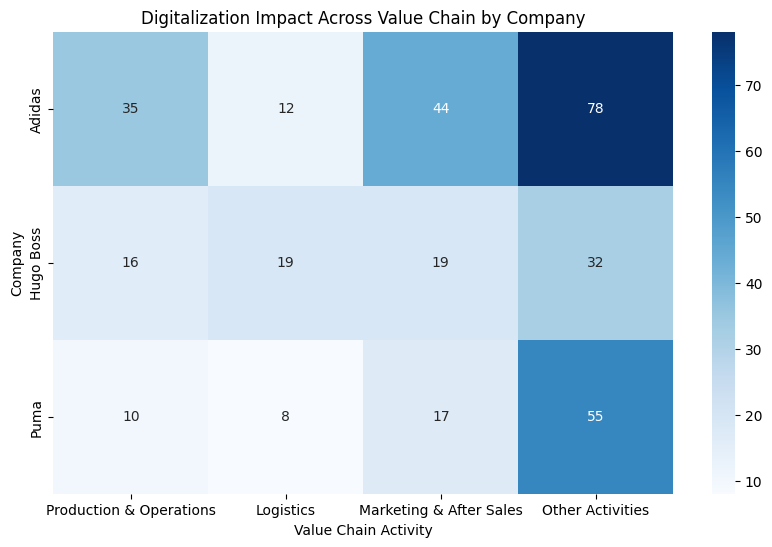

In [22]:
# Selecting relevant columns for value chain mapping
value_chain_columns = [
    "company_name",
    "impact_in_production_and_operations_(yes=1,_no=0)",
    "impact_in_logistics_(yes=_1,_no=0)",
    "impact_in_marketing_and_after_sales_(yes=1,_no=0)",
    "others_(yes=1_,_no=0)"
]

df_value_chain = df[value_chain_columns]
df_value_chain.columns = ["Company", "Production & Operations", "Logistics", "Marketing & After Sales", "Other Activities"]

# Aggregate by company
df_value_chain_summary = df_value_chain.groupby("Company").sum()

# Heatmap of Digitalization Across Value Chain
plt.figure(figsize=(10, 6))
sns.heatmap(df_value_chain_summary, annot=True, cmap="Blues", fmt="d")
plt.title("Digitalization Impact Across Value Chain by Company")
plt.xlabel("Value Chain Activity")
plt.ylabel("Company")
plt.show()


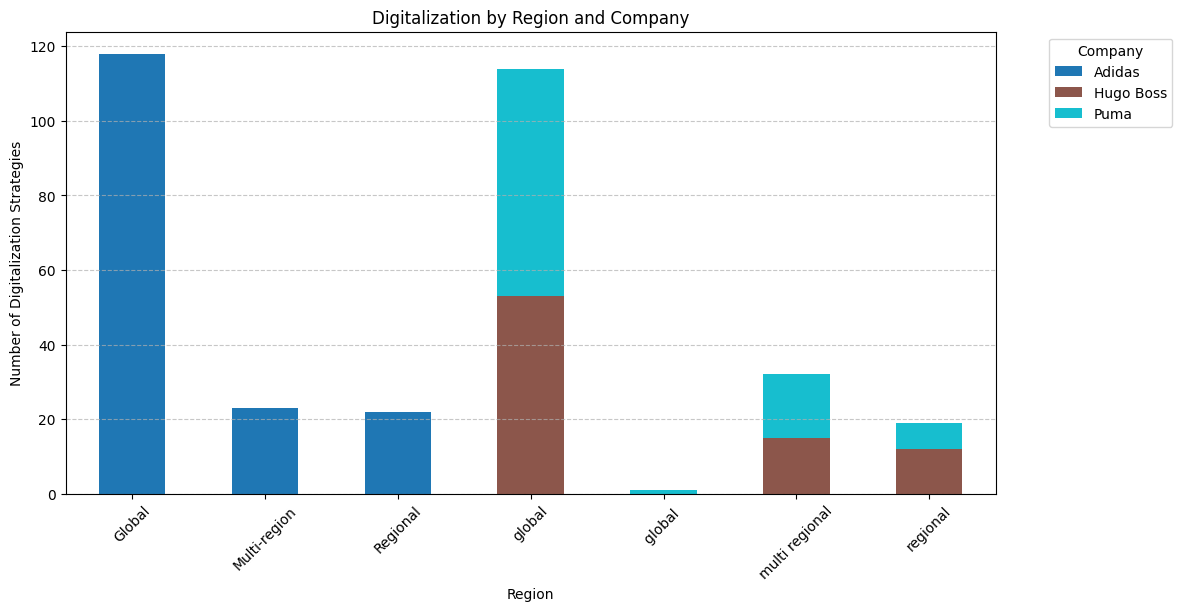

In [23]:
# Group data by company and region
df_region_company = df.groupby(["geographical_impact", "company_name"]).size().unstack(fill_value=0)

# Stacked Bar Chart: Digitalization by Region and Company
df_region_company.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab10")
plt.xlabel("Region")
plt.ylabel("Number of Digitalization Strategies")
plt.title("Digitalization by Region and Company")
plt.xticks(rotation=45)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


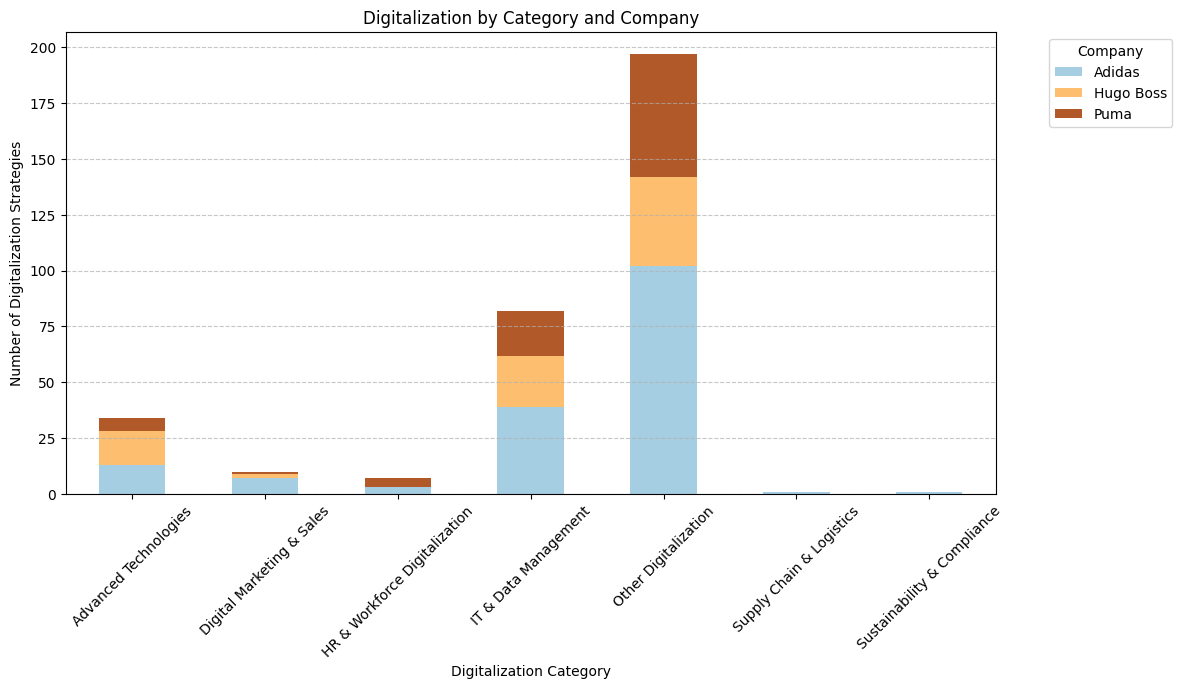

In [24]:
# Classify digitalization strategies into subcategories based on keywords
def classify_category(strategy):
    strategy = str(strategy).lower()
    if any(word in strategy for word in ["ai", "machine learning", "big data", "automation"]):
        return "Advanced Technologies"
    elif any(word in strategy for word in ["ecommerce", "sales", "advertisement", "customer"]):
        return "Digital Marketing & Sales"
    elif any(word in strategy for word in ["supply chain", "logistics", "inventory"]):
        return "Supply Chain & Logistics"
    elif any(word in strategy for word in ["hr", "training", "workforce"]):
        return "HR & Workforce Digitalization"
    elif any(word in strategy for word in ["sustainability", "compliance", "environment"]):
        return "Sustainability & Compliance"
    elif any(word in strategy for word in ["it", "cybersecurity", "data management"]):
        return "IT & Data Management"
    else:
        return "Other Digitalization"

# Apply classification
df["category"] = df["strategy"].apply(classify_category)

# Group by category and company
df_category_company = df.groupby(["category", "company_name"]).size().unstack(fill_value=0)

# Stacked Bar Chart: Digitalization by Category & Company
df_category_company.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Paired")
plt.xlabel("Digitalization Category")
plt.ylabel("Number of Digitalization Strategies")
plt.title("Digitalization by Category and Company")
plt.xticks(rotation=45)
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
